# **Notebook Purposes:-**

* **This dataset is about patient's feedback for certain drug brands and how do they feel after having the doses.**
* **We are going to perform some of useful feature engineers in regrad to textual data such as N-grams and EDA.**
* **Applying Sentimental analysis for patient's feedback by using common machine learning models for textual data such as SVM, Logistic Regression and evaluate our model accuray.**

# **Importing:-**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('setup Completed^___^')

setup Completed^___^


# **Read the data:-**

In [2]:
data = pd.read_csv('../input/kuc-hackathon-winter-2018/drugsComTrain_raw.csv')
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


# **Play around some columns:-**

In [3]:
data.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [4]:
data.dropna(axis=0, inplace=True)

In [5]:
data.drop(['uniqueID', 'condition', 'date','usefulCount'], axis=1, inplace=True)

In [6]:
data.head()

,drugName,review,rating
0,Valsartan,"""It has no side effect, I take it in combinati...",9
1,Guanfacine,"""My son is halfway through his fourth week of ...",8
2,Lybrel,"""I used to take another oral contraceptive, wh...",5
3,Ortho Evra,"""This is my first time using any form of birth...",8
4,Buprenorphine / naloxone,"""Suboxone has completely turned my life around...",9


In [7]:
data.tail()

,drugName,review,rating
161292,Campral,"""I wrote my first report in Mid-October of 201...",10
161293,Metoclopramide,"""I was given this in IV before surgey. I immed...",1
161294,Orencia,"""Limited improvement after 4 months, developed...",2
161295,Thyroid desiccated,"""I&#039;ve been on thyroid medication 49 years...",10
161296,Lubiprostone,"""I&#039;ve had chronic constipation all my adu...",9


In [8]:
data.shape

(160398, 3)

# **Make the data a bit smaller:-**

In [9]:
data = data[data.groupby('drugName')['drugName'].transform('size') > 20]

In [10]:
data = data.head(10000)

# **Preprocessing:-**

In [11]:
print('the review column data types is:',data['review'].dtypes)
data['review'] = data['review'].astype(str)

the review column data types is: object


# **Converting to lowerCase:-**

**Converting to lower case is necessary. Otherwise, it will consider the same word with an uppercase as a different word. Like ‘me’ and ‘Me’ will be considered as different words.**

In [12]:
data['review1'] = data['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['review1'].head()

0    "it has no side effect, i take it in combinati...
1    "my son is halfway through his fourth week of ...
3    "this is my first time using any form of birth...
4    "suboxone has completely turned my life around...
5    "2nd day on 5mg started to work with rock hard...
Name: review1, dtype: object

# **Removing Punctuations:-**

**This step is to remove the punctuations. Because of punctuation, a word might be treated differently than it originally is. For example ‘use’ and ‘use:’ will become different words because of punctuation.**

In [13]:
data['review1'] = data['review1'].str.replace('[^\w\s]', '')
data['review1'].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0    it has no side effect i take it in combination...
1    my son is halfway through his fourth week of i...
3    this is my first time using any form of birth ...
4    suboxone has completely turned my life around ...
5    2nd day on 5mg started to work with rock hard ...
Name: review1, dtype: object

# **Removing StopWords:-**

In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
data['review1'] = data['review1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['review1'].head()

0    side effect take combination bystolic 5 mg fis...
1    son halfway fourth week intuniv became concern...
3    first time using form birth control i039m glad...
4    suboxone completely turned life around feel he...
5    2nd day 5mg started work rock hard erections h...
Name: review1, dtype: object

# **Remove the Rare Words:-**

In [16]:
freq = pd.Series(' '.join(data['review1']).split()).value_counts()
less_freq = list(freq[freq == 1].index)
less_freq

['vera',
 '182lbs',
 'menstural',
 'coldsores',
 'declared',
 'eot',
 'harvest',
 'cyles',
 'sjoumlgren039s',
 'medsbesides',
 'hesitently',
 'restore',
 'chloridiazepoxide',
 '200150',
 'breaktime',
 'pillars',
 'immunosystem',
 'killersquot',
 'dyndrome',
 'attacksquot',
 'urology',
 'impotence',
 'aphrodisiac',
 'quotdone',
 'dischargemeds',
 'cigna',
 'againespecially',
 'lotyelling',
 'anxiously',
 'quotrapidquot',
 'depigmentation',
 'touchy',
 'espesically',
 'preserve',
 'stall',
 'perscriped',
 'printed',
 'gobsmacked',
 'pregnancyhowever',
 'stomachrelated',
 'yearandahalf',
 'exiting',
 'nz',
 'jacoby',
 'desert',
 'awaited',
 'sensitisation',
 'nos',
 'quotasthma',
 'dermatillomaniaspecialized',
 '25mins',
 'quotdevicequot',
 'glaring',
 'marathonvery',
 'hashimoto039s',
 'hopeing',
 'levelling',
 'bertie',
 'bettertook',
 'relatives',
 'interconnected',
 'jerry',
 'verified',
 'quotstop',
 'colony',
 'thinkingquot',
 'hometown',
 'grandfather',
 'psychic',
 'reestablish',


In [17]:
data['review1'] = data['review1'].apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))
data['review1'].head()

0    side effect take combination bystolic 5 mg fis...
1    son halfway fourth week intuniv became concern...
3    first time using form birth control i039m glad...
4    suboxone completely turned life around feel he...
5    2nd day 5mg started work rock hard erections h...
Name: review1, dtype: object

# **Stemming and lemmatization:-**

In [18]:
from textblob import TextBlob, Word, Blobber
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [19]:
data['review1'] = data['review1'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


In [20]:
data['review1'] = data['review1'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['review1'].head()

0         side effect take combin bystol 5 mg fish oil
1    son halfway fourth week intuniv becam concern ...
3    first time use form birth control i039m glad w...
4    suboxon complet turn life around feel healthie...
5    2nd day 5mg start work rock hard erect howev h...
Name: review1, dtype: object

**Adding the length of the review and the word count of each review.**

In [21]:
data['review_len'] = data['review'].astype(str).apply(len)
data['word_count'] = data['review'].apply(lambda x: len(str(x).split()))

**Add one more feature called polarity. Polarity shows the sentiment of a piece of text. It counts the negative and positive words and determines the polarity. The value ranges from -1 to 1 where -1 represents the negative sentiment, 0 represents neutral and 1 represent positive sentiment.**

In [22]:
data['polarity'] = data['review1'].map(lambda text: TextBlob(text).sentiment.polarity)
data.head()

,drugName,review,rating,review1,review_len,word_count,polarity
0,Valsartan,"""It has no side effect, I take it in combinati...",9,side effect take combin bystol 5 mg fish oil,79,17,0.000000
1,Guanfacine,"""My son is halfway through his fourth week of ...",8,son halfway fourth week intuniv becam concern ...,741,141,0.237500
3,Ortho Evra,"""This is my first time using any form of birth...",8,first time use form birth control i039m glad w...,448,89,0.300000
4,Buprenorphine / naloxone,"""Suboxone has completely turned my life around...",9,suboxon complet turn life around feel healthie...,719,124,0.191667
5,Cialis,"""2nd day on 5mg started to work with rock hard...",2,2nd day 5mg start work rock hard erect howev h...,403,68,0.081667


array([[<AxesSubplot:title={'center':'review_len'}>,
        <AxesSubplot:title={'center':'word_count'}>],
       [<AxesSubplot:title={'center':'polarity'}>,
        <AxesSubplot:title={'center':'rating'}>]], dtype=object)

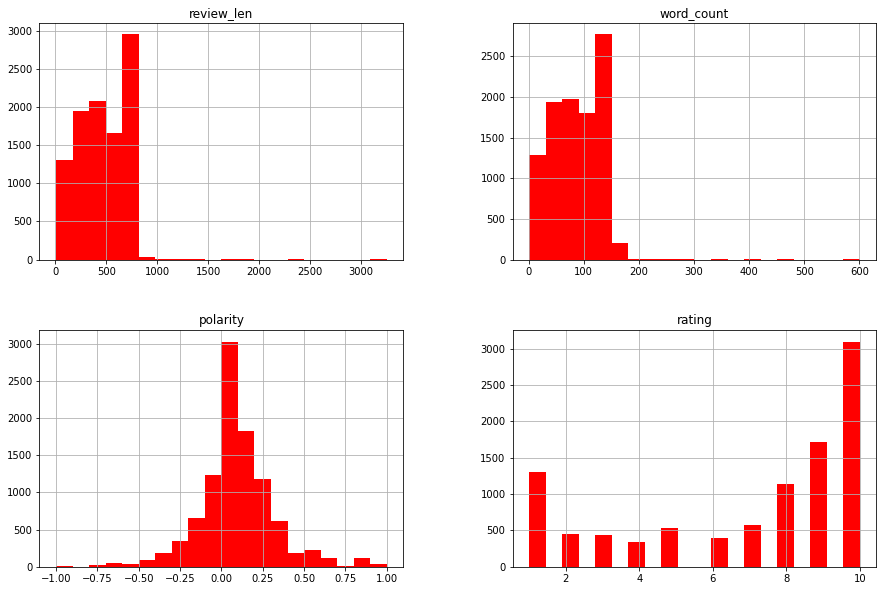

In [23]:
data[['review_len', 'word_count','polarity', 'rating']].hist(bins=20, figsize=(15, 10), color='red')

# **Rating VS Polarity:-**

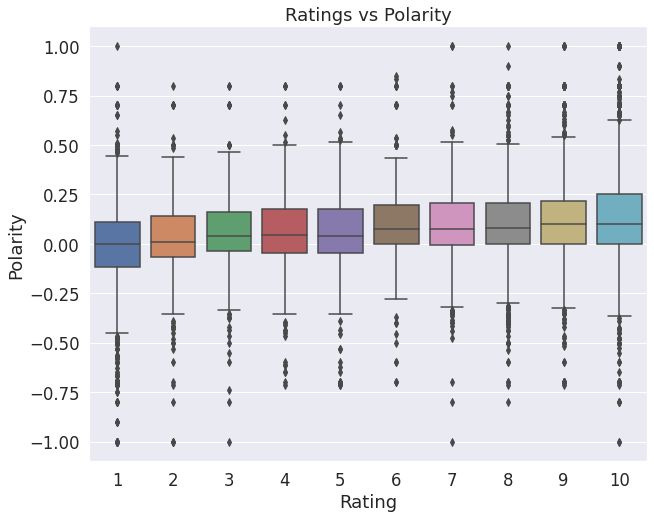

In [24]:
plt.figure(figsize=(10, 8))
sns.set_style('white')
sns.set(font_scale= 1.5)
sns.boxplot(x= 'rating', y='polarity', data=data)
plt.xlabel('Rating')
plt.ylabel('Polarity')
plt.title('Ratings vs Polarity')
plt.show()

**Mean polarity keeps going up with the higher rating. There are a lot of outliers in rating 1 and 5 though. Maybe looking at the numbers will help a bit more.**

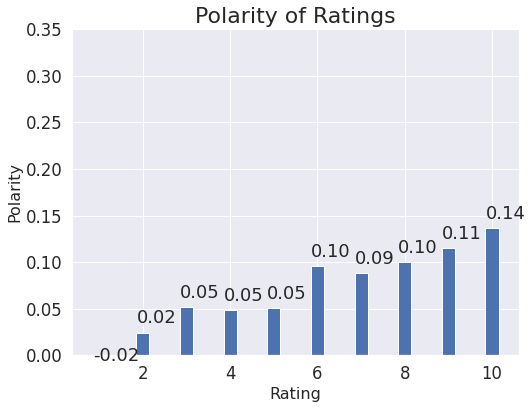

In [25]:
mean_pol = data.groupby('rating')['polarity'].agg([np.mean])
mean_pol.columns = ['mean_polarity']
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(mean_pol.index, mean_pol.mean_polarity, width=0.3)
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+0.01, str("{:.2f}".format(i.get_height())))
    plt.title("Polarity of Ratings", fontsize=22)
plt.ylabel("Polarity", fontsize=16)
plt.xlabel("Rating", fontsize=16)
plt.ylim(0, 0.35)
plt.show()

**Count plot shows the count of the reviews of each rating available in the datase:-**

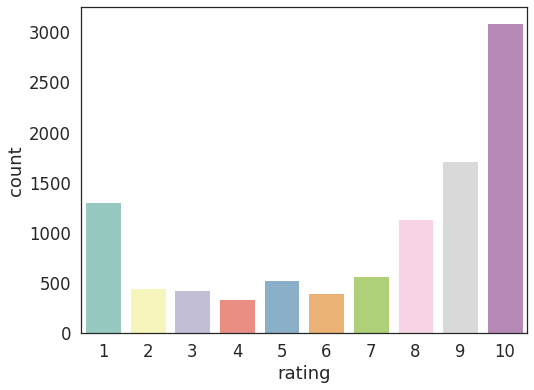

In [26]:
plt.figure(figsize=(8, 6))
sns.set_style('white')
ax = sns.countplot(x="rating", data=data, palette="Set3")

**Most of the reviews of the dataset have a rating of 10, so it will be intersting to see if the review length changes with rating:**

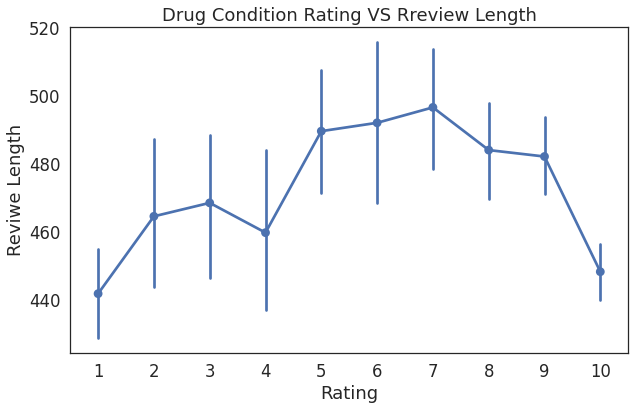

In [27]:
plt.figure(figsize=(10, 6))
sns.pointplot(x = 'rating', y='review_len', data=data)
plt.xlabel('Rating')
plt.ylabel('Reviwe Length')
plt.title('Drug Condition Rating VS Rreview Length')
plt.show()

# **Get the top 30 conditions based on polarity:-**

In [28]:
condition_pol = data.groupby('drugName')['polarity'].agg([np.mean])
condition_pol.columns = ['polarity']
condition_pol = condition_pol.sort_values('polarity', ascending=False)
condition_pol = condition_pol.head(30)
condition_pol

,polarity
drugName,
Benzoyl peroxide,1.000000
Doxazosin,0.800000
Zyrtec,0.562469
Phenylephrine,0.554167
Exalgo,0.500000
Rabeprazole,0.450000
Eucrisa,0.437500
Atropine / diphenoxylate,0.432197
Relpax,0.430667


# **WordCloud:-**

**Wordcloud is a common and beautiful visualization for text data to plot the frequency of words. You may need to install wordcloud if you do not have it already, using this command:**

In [29]:
conda install -c conda-forge wordcloud

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.12.0               |   py37h89c1867_0         1.0 MB  conda-forge
    openssl-1.1.1n             |       h166bdaf_0         2.1 MB  conda-forge
    wordcloud-1.8.1            |   py3

In [30]:
text = " ".join(review for review in data.review1)

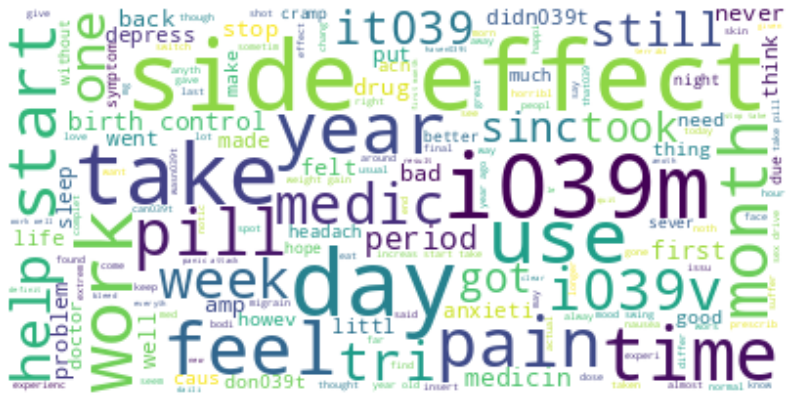

In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl"])
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Frequency Charts:-**

**This is common practice in text data analysis to make charts of the frequency of words. That gives a good idea about what people are talking about most in this text. First, find the frequency of each word in the review column of the dataset. Then plot the top 20 words based on the frequency.**

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['review1'], 20)
df1 = pd.DataFrame(common_words, columns = ['Review', 'count'])
df1.head()

,Review,count
0,day,6201
1,take,6093
2,month,4408
3,year,4131
4,work,3951


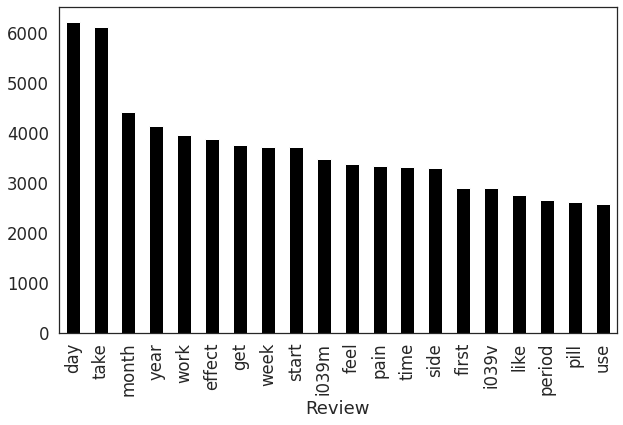

In [34]:
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(kind='bar',color='black',figsize = (10, 6))
xlabel = 'Top Words'
ylabel = 'Count'
title = 'BarChart represent the Top Words Frequency'    
plt.show()

**These are the topmost occurring words in the reviews. But instead of just seeing one word two consecutive words or three consecutive words are more helpful. They provide some meaning. The following plot shows the topmost frequent bigrams:**

In [35]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(data['review1'], 30)
df2 = pd.DataFrame(common_words2, columns=['Review', "Count"])
df2.head()

,Review,Count
0,side effect,2989
1,birth control,1034
2,feel like,583
3,weight gain,560
4,start take,542


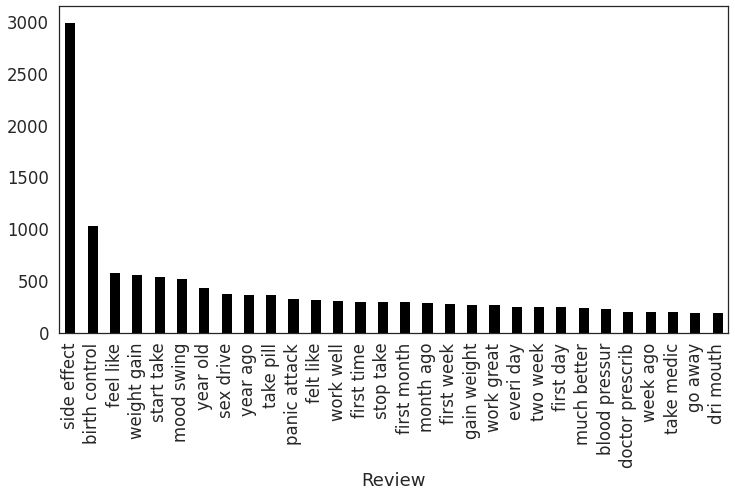

In [36]:
df2.groupby('Review').sum()['Count'].sort_values(ascending=False).plot(kind='bar',figsize=(12,6), color='black')
xlabel = "Bigram Words"
ylabel = "Count"
title = "Bar chart of Bigrams Frequency"
plt.show()

**Look at the bigrams. They are somewhat phrases that make more sense. The next plot is the trigrams. Maybe that will provide us some more ideas about what people are saying in the reviews.**

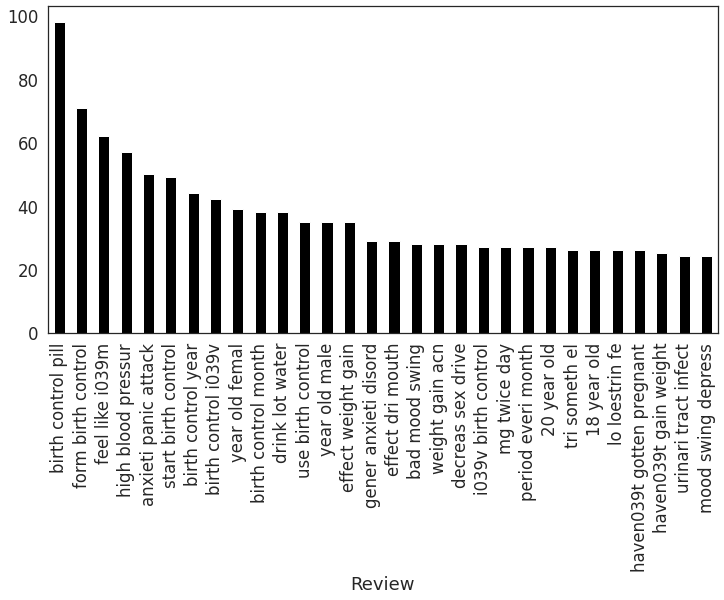

In [37]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words3 = get_top_n_trigram(data['review1'], 30)
df3 = pd.DataFrame(common_words3, columns = ['Review' , 'Count'])
df3.groupby('Review').sum()['Count'].sort_values(ascending=False).plot(kind='bar',figsize=(12,6), color='black')
xlabel = "Trigram Words"
ylabel = "Count"
title = "Bar chart of Trigrams Frequency"
plt.show()

# **Sentiment Analysis:-**

In [38]:
data.head()

,drugName,review,rating,review1,review_len,word_count,polarity
0,Valsartan,"""It has no side effect, I take it in combinati...",9,side effect take combin bystol 5 mg fish oil,79,17,0.000000
1,Guanfacine,"""My son is halfway through his fourth week of ...",8,son halfway fourth week intuniv becam concern ...,741,141,0.237500
3,Ortho Evra,"""This is my first time using any form of birth...",8,first time use form birth control i039m glad w...,448,89,0.300000
4,Buprenorphine / naloxone,"""Suboxone has completely turned my life around...",9,suboxon complet turn life around feel healthie...,719,124,0.191667
5,Cialis,"""2nd day on 5mg started to work with rock hard...",2,2nd day 5mg start work rock hard erect howev h...,403,68,0.081667


In [39]:
data.rating.describe()

count    10000.000000
mean         6.950700
std          3.268813
min          1.000000
25%          4.000000
50%          8.000000
75%         10.000000
max         10.000000
Name: rating, dtype: float64

In [40]:
data.rating.value_counts()

10    3095
9     1716
1     1307
8     1141
7      575
5      530
2      455
3      435
6      402
4      344
Name: rating, dtype: int64

In [41]:
# Remove any Neutral ratings equal to 3 : 
data = data[data['rating'] != 3]
data['Positively Rated'] = np.where(data['rating'] > 3, 1, 0)
data.head(10)

,drugName,review,rating,review1,review_len,word_count,polarity,Positively Rated
0,Valsartan,"""It has no side effect, I take it in combinati...",9,side effect take combin bystol 5 mg fish oil,79,17,0.000000,1
1,Guanfacine,"""My son is halfway through his fourth week of ...",8,son halfway fourth week intuniv becam concern ...,741,141,0.237500,1
3,Ortho Evra,"""This is my first time using any form of birth...",8,first time use form birth control i039m glad w...,448,89,0.300000,1
4,Buprenorphine / naloxone,"""Suboxone has completely turned my life around...",9,suboxon complet turn life around feel healthie...,719,124,0.191667,1
5,Cialis,"""2nd day on 5mg started to work with rock hard...",2,2nd day 5mg start work rock hard erect howev h...,403,68,0.081667,0
6,Levonorgestrel,"""He pulled out, but he cummed a bit in me. I t...",1,pull cum bit took plan b 26 hour later took pr...,142,30,0.111111,0
7,Aripiprazole,"""Abilify changed my life. There is hope. I was...",10,abilifi chang life hope zoloft clonidin first ...,733,146,0.036742,1
8,Keppra,""" I Ve had nothing but problems with the Kepp...",1,noth problem keppera constant shake arm amp le...,193,35,0.200000,0
9,Ethinyl estradiol / levonorgestrel,"""I had been on the pill for many years. When m...",8,pill mani year doctor chang rx chateal effect ...,737,142,-0.085185,1
10,Topiramate,"""I have been on this medication almost two wee...",9,medic almost two week start 25mg work way 100m...,730,148,0.211111,1


In [42]:
data['Positively Rated'].mean()

0.8157867224255096

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['review1'], data['Positively Rated'], random_state = 0)

In [44]:
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 zoloft save life it039 like wake lifelong nightmar lifetim panic attack stress anxieti percept 039normal039 still feel normal stress anxieti ration caus car broke lost job etc there039 feel quit like feel control life self


X_train shape:  (7173,)


# **CountVectorizer:-**

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
# fit the countvectorizer to the training data: 
vect = CountVectorizer().fit(X_train)

In [46]:
vect.get_feature_names()[:2000]

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '0025',
 '003',
 '005',
 '01',
 '010',
 '010816',
 '02',
 '025',
 '025mg',
 '03',
 '039',
 '03909',
 '03914',
 '03916',
 '039accident039',
 '039brain',
 '039cure039',
 '039cured039',
 '039fog039',
 '039high039',
 '039it',
 '039lutera039',
 '039normal039',
 '039pco',
 '039ve',
 '05',
 '05mg',
 '06',
 '07',
 '08',
 '09',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100039',
 '1000mg',
 '1000x',
 '100lb',
 '100mcg',
 '100mg',
 '100pm',
 '100x',
 '101',
 '1010',
 '1011',
 '1012',
 '1015',
 '102',
 '1020',
 '102717',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10325',
 '104',
 '1040',
 '10413',
 '105',
 '10am',
 '10day',
 '10kg',
 '10lb',
 '10mg',
 '10min',
 '10oz',
 '10pm',
 '10th',
 '10x',
 '10yr',
 '11',
 '110',
 '1100',
 '1100pm',
 '110115',
 '110lb',
 '1114',
 '112',
 '1125mg',
 '113',
 '1130pm',
 '114',
 '11470',
 '115',
 '11570',
 '116',
 '117',
 '117lb',
 '118',
 '11915',
 '11pm',
 '11th',
 '12',
 '120',
 '1200',
 '1200mg',
 '120lb',
 '120mg',
 '1214',
 '1215',
 '1218',
 '123

In [47]:
len(vect.get_feature_names())

6982

In [48]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<7173x6982 sparse matrix of type '<class 'numpy.int64'>'
	with 258227 stored elements in Compressed Sparse Row format>

In [49]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [50]:
from sklearn.metrics import accuracy_score

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

print('Acurracy: ', accuracy_score(y_test, predictions))

Acurracy:  0.8386287625418061


In [51]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['placebo' 'disappoint' 'wast' 'mad' 'ridicul' 'ultrasound' 'reaction'
 'nightmar' 'horrif' '145']

Largest Coefs: 
['love' 'calm' 'miracl' 'amaz' 'great' 'tremend' 'happier' 'best' 'reliev'
 'gone']


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())

3466

In [53]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.8461538461538461


In [54]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['9am' 'silli' 'lamisil' 'veggi' '190' 'bypass' '2001' 'threshold'
 'rubbish' 'anesthesia']

Largest tfidf: 
['posit' 'treat' 'great' 'headach' 'help' 'expens' 'effect' 'love' 'magic'
 'depress']


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [55]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['worst' 'horribl' 'wors' 'never' 'noth' 'made' 'call' 'cri' 'bleed'
 'wast']

Largest Coefs: 
['great' 'love' 'year' 'best' 'amaz' 'gone' 'life' 'far' 'wonder' 'miracl']


# **N-grams:-**

In [56]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

11473

In [57]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('Accuracy: ', accuracy_score(y_test, predictions))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy:  0.8465719063545151


In [58]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['never take' 'didn039t help' 'wast' 'worst' 'wors' 'month can039t' 'noth'
 'disappoint' 'doesn039t work' 'effect never']

Largest Coefs: 
['love' 'amaz' 'calm' 'great' 'miracl' 'best' 'gone' 'sometim' 'tremend'
 'make feel']


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# **Support Vector Machine:-**

In [59]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_vectorized, y_train)

#Predict the response for test dataset
predictions = clf.predict(vect.transform(X_test))

In [60]:
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.8131270903010034
